### 1. Import dataset and data cleaning

In [6]:
#Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [7]:
#Read dataset

df = pd.read_csv("data/shopping_behavior_updated.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
df.shape

(3900, 18)

In [10]:
#Drop non necessary columns

df.drop(columns= 'Customer ID', inplace= True)

In [11]:
#Check null values

df.isnull().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
#Check duplicate values

df.duplicated().sum()

np.int64(0)

In [13]:
#Check unique values

print(df['Age'].unique())
print(df['Gender'].unique())
print(df['Item Purchased'].unique())
print(df['Category'].unique())
print(df['Size'].unique())
print(df['Color'].unique())
print(df['Season'].unique())
print(df['Subscription Status'].unique())
print(df['Shipping Type'].unique())
print(df['Discount Applied'].unique())
print(df['Promo Code Used'].unique())
print(df['Payment Method'].unique())
print(df['Frequency of Purchases'].unique())

[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]
['Male' 'Female']
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
['L' 'S' 'M' 'XL']
['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']
['Winter' 'Spring' 'Summer' 'Fall']
['Yes' 'No']
['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
['Yes' 'No']
['Yes' 'No']
['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 

In [14]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [15]:
#Create new column with aggruped ages
df['Age Group'] = pd.cut(df['Age'], bins=[17, 30, 40, 60, 100], labels=['18-30', '31-40', '41-60', '+60'])
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,41-60
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-30
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,41-60
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-30
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-60


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     3900 non-null   int64   
 1   Gender                  3900 non-null   object  
 2   Item Purchased          3900 non-null   object  
 3   Category                3900 non-null   object  
 4   Purchase Amount (USD)   3900 non-null   int64   
 5   Location                3900 non-null   object  
 6   Size                    3900 non-null   object  
 7   Color                   3900 non-null   object  
 8   Season                  3900 non-null   object  
 9   Review Rating           3900 non-null   float64 
 10  Subscription Status     3900 non-null   object  
 11  Shipping Type           3900 non-null   object  
 12  Discount Applied        3900 non-null   object  
 13  Promo Code Used         3900 non-null   object  
 14  Previous Purchases      

### 2. EDA

#### 2.1. Distribution analysis of numerical variables

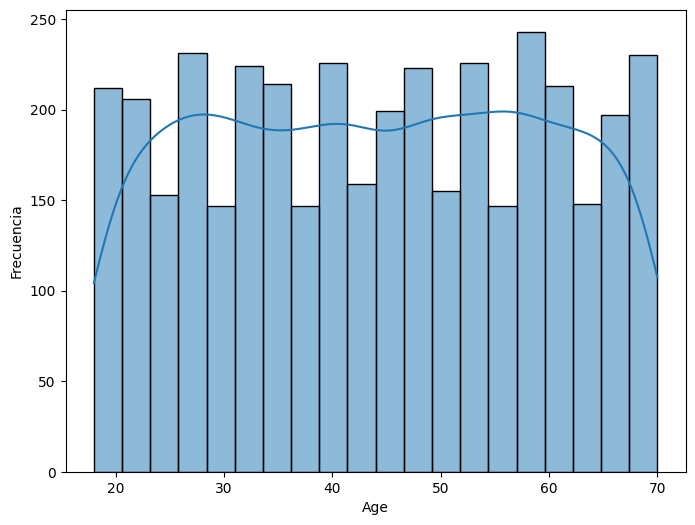

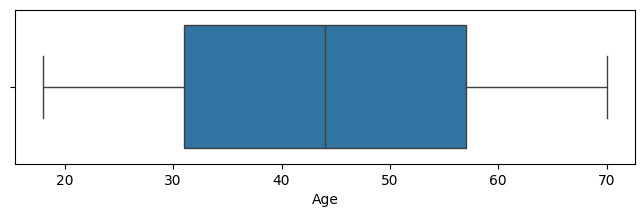

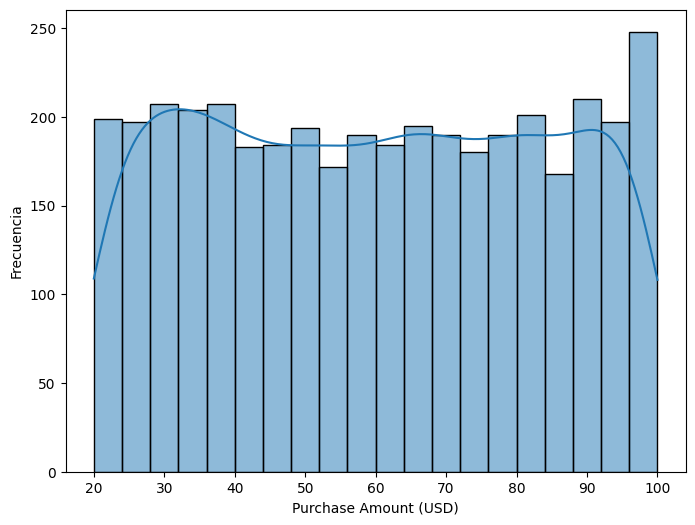

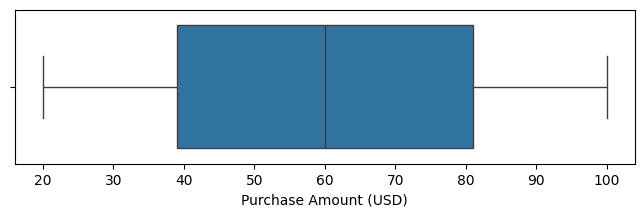

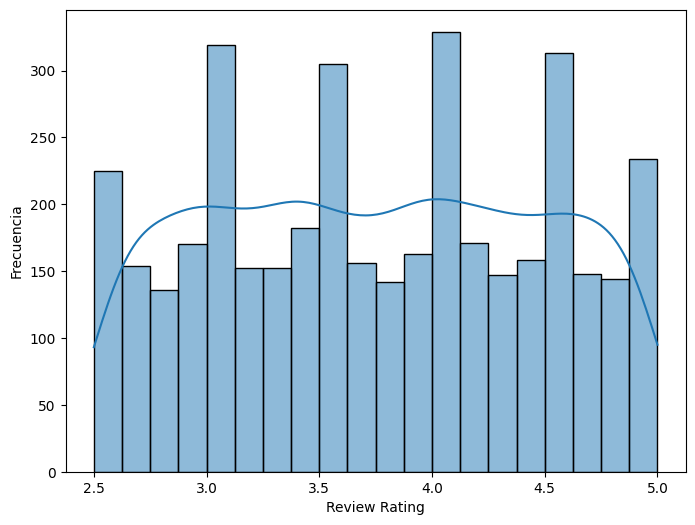

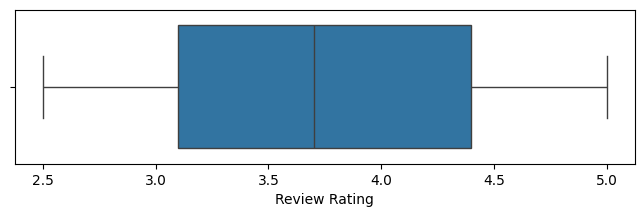

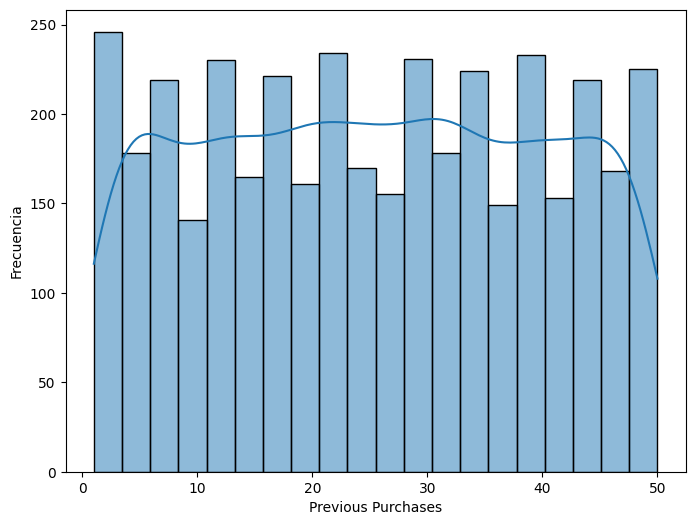

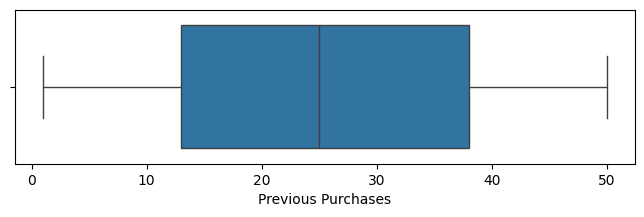

In [17]:
num_col = df.select_dtypes(include=['int','float'])

for col in num_col:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.boxplot(x=col, data=df)
    plt.xlabel(col)
    plt.show()



#### 2.2. Univariate analysis

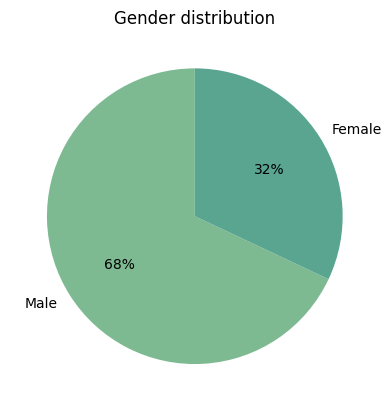

In [18]:
colors = sns.color_palette('crest')
colors2 = sns.color_palette('Pastel1')

gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=90, colors=colors)
plt.title('Gender distribution')
plt.show()


C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\1423837390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack()


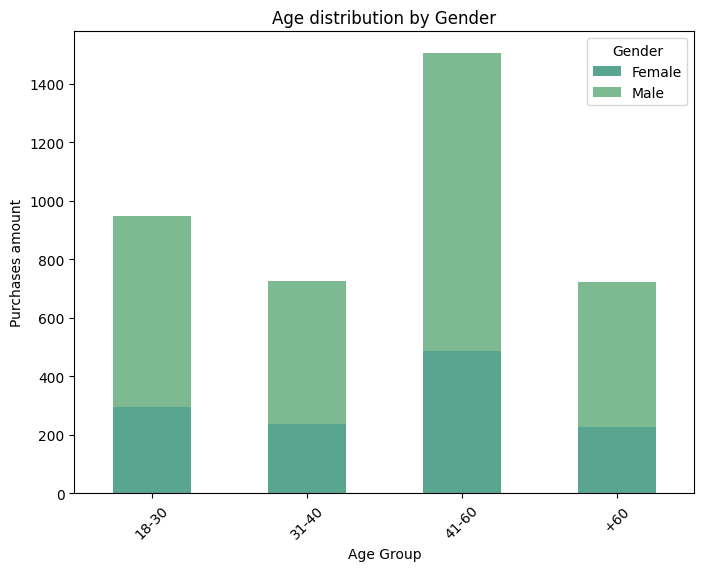

In [19]:


age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack()
ordered_colors = [colors[1], colors[0]]

age_gender_counts.plot(
    kind='bar',
    color=ordered_colors,
    stacked=True,
    figsize=(8, 6),
)


plt.title('Age distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Purchases amount')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

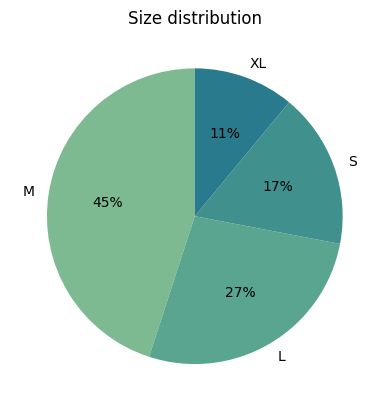

In [20]:
size_counts = df['Size'].value_counts()
plt.pie(size_counts, labels=size_counts.index, autopct='%1.0f%%', colors=colors, startangle=90)
plt.title('Size distribution')
plt.show()

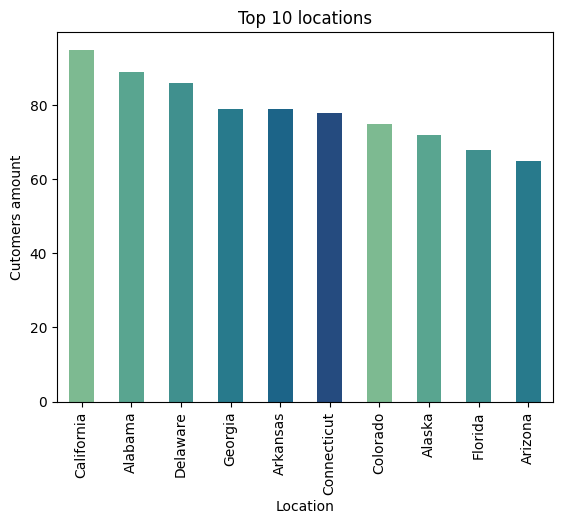

In [21]:
clientes_por_zona = df.groupby('Location').size().head(10)
clientes_por_zona.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Top 10 locations')
plt.ylabel('Cutomers amount')
plt.xlabel('Location')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\1507903523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=colors)
C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\1507903523.py:3: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  graf = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=colors)


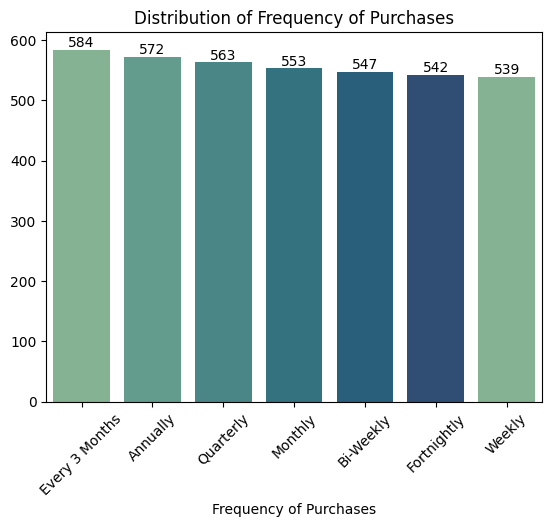

In [22]:
sorted_counts = df['Frequency of Purchases'].value_counts().sort_values(ascending=False)

graf = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=colors)

for i, value in enumerate(sorted_counts.values):
    graf.text(
        i,
        value,
        str(value),
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.title('Distribution of Frequency of Purchases')
plt.xticks(rotation=45)
plt.show()

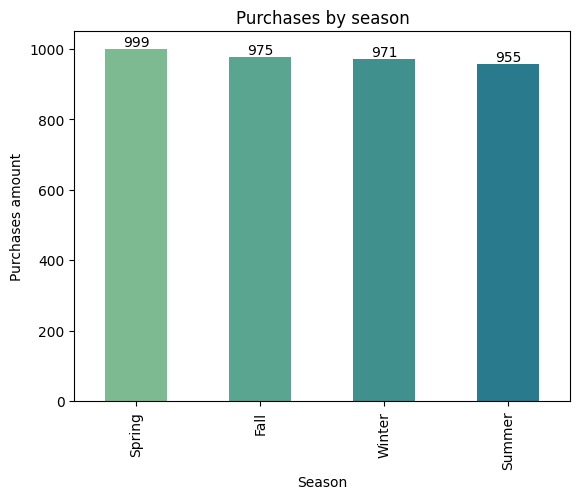

In [23]:
season_counts = df['Season'].value_counts()

graf = season_counts.plot(kind='bar', color=colors)

for i, value in enumerate(season_counts.values):
    graf.text(
        i,
        value,
        str(value),
        ha='center', va='bottom', fontsize=10
    )


plt.title('Purchases by season')
plt.ylabel('Purchases amount')
plt.show()

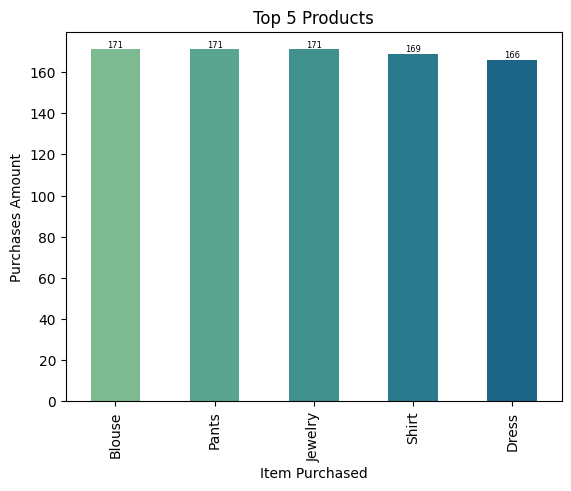

In [24]:
item_counts = df['Item Purchased'].value_counts().head(5)
graf = item_counts.plot(kind='bar', color=colors)

for i, value in enumerate(item_counts.values):
    graf.text(
        i,
        value,
        str(value),
        ha='center', va='bottom', fontsize=6
    )


plt.title('Top 5 Products')
plt.ylabel('Purchases Amount')
plt.show()

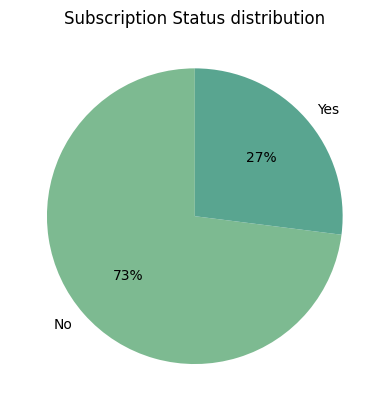

In [25]:
subs_counts = df['Subscription Status'].value_counts()
plt.pie(subs_counts, labels=subs_counts.index, autopct='%1.0f%%', colors=colors, startangle=90)
plt.title('Subscription Status distribution')
plt.show()

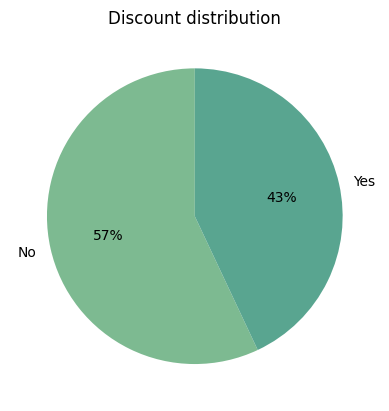

In [26]:
disc_counts = df['Discount Applied'].value_counts()
plt.pie(disc_counts, labels=disc_counts.index, autopct='%1.0f%%', colors=colors, startangle=90)
plt.title('Discount distribution')
plt.show()

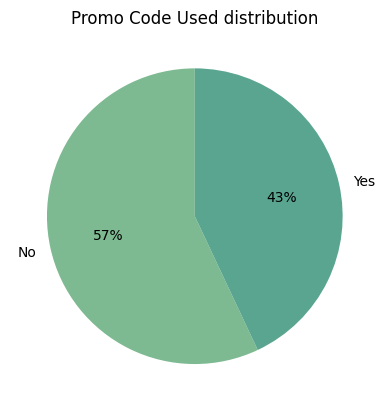

In [27]:
code_counts = df['Promo Code Used'].value_counts()
plt.pie(code_counts, labels=code_counts.index, autopct='%1.0f%%', colors=colors, startangle=90)
plt.title('Promo Code Used distribution')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\2884649884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Review Rating', palette='coolwarm_r', data=df, order=sorted(df['Review Rating'].unique()))


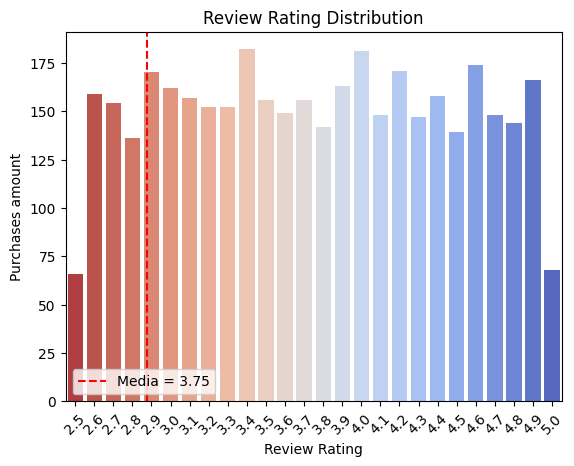

In [28]:
mean_value = df['Review Rating'].mean()
sns.countplot(x='Review Rating', palette='coolwarm_r', data=df, order=sorted(df['Review Rating'].unique()))
plt.title('Review Rating Distribution')
plt.axvline(mean_value, color='red', linestyle='--', label=f'Media = {mean_value:.2f}')
plt.legend(loc='lower left')
plt.ylabel('Purchases amount')
plt.xticks(rotation=45)
plt.show()

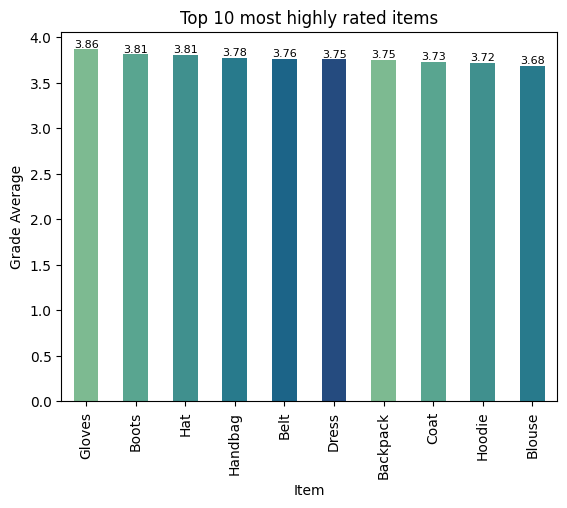

In [29]:
calificaciones_por_producto = df.groupby('Item Purchased')['Review Rating'].mean().head(10)

graf = calificaciones_por_producto.sort_values(ascending=False).plot(kind='bar', color=colors)

for i, value in enumerate(calificaciones_por_producto.sort_values(ascending=False).values):
    graf.text(
        i, 
        value, 
        f'{value:.2f}',
        ha='center', 
        va='bottom', 
        fontsize=8
    )

plt.title('Top 10 most highly rated items')
plt.ylabel('Grade Average')
plt.xlabel('Item')
plt.show()

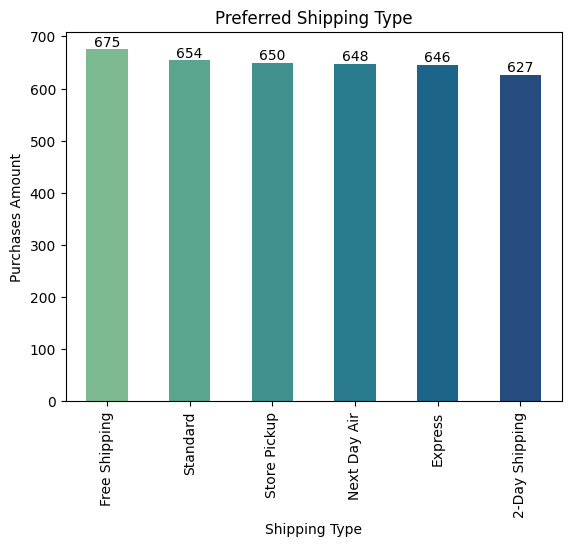

In [30]:
shipping_counts = df['Shipping Type'].value_counts()
graf = shipping_counts.plot(kind='bar', color=colors)

for i, value in enumerate(shipping_counts.values):
    graf.text(
        i,
        value,
        str(value),
        ha='center', va='bottom', fontsize=10
    )

plt.title('Preferred Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Purchases Amount')
plt.show()

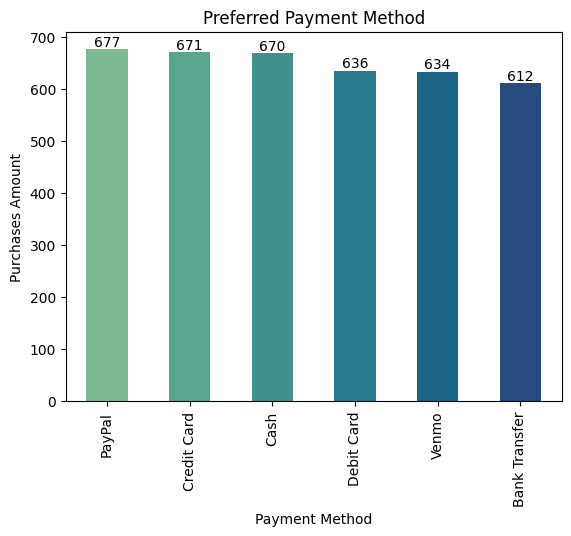

In [31]:
payment_method_counts = df['Payment Method'].value_counts()
graf = payment_method_counts.plot(kind='bar', color=colors)

for i, value in enumerate(payment_method_counts.values):
    graf.text(
        i,
        value,
        str(value),
        ha='center', va='bottom', fontsize=10
    )

plt.title('Preferred Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchases Amount')
plt.show()

#### 2.3. Bivariate Analysis

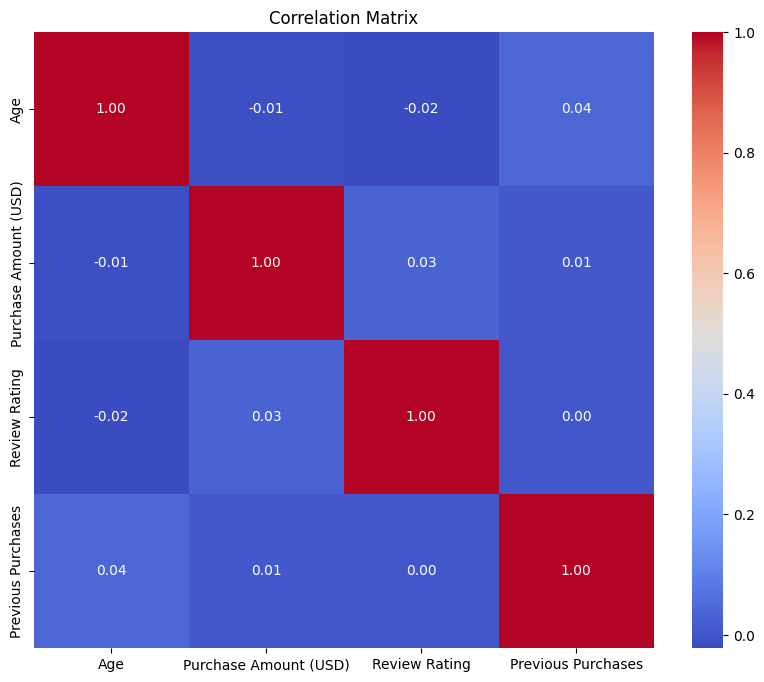

In [32]:
corr_matrix = num_col.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\3430569006.py:10: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(


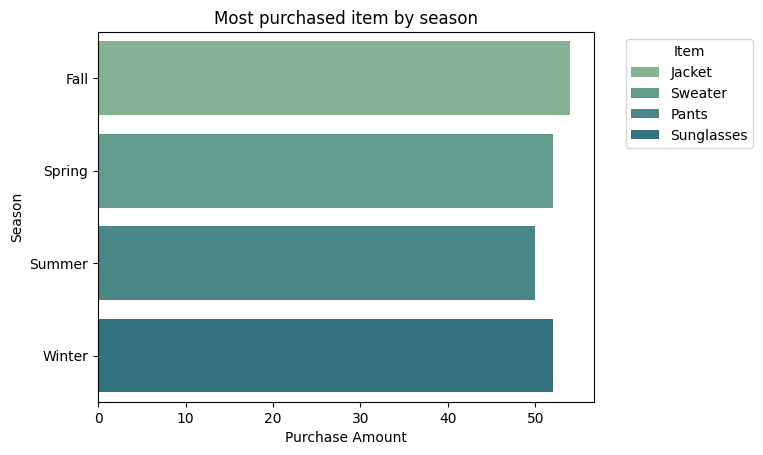

In [33]:
season_top_items = (
    df.groupby(['Season', 'Item Purchased'])
    .size()
    .reset_index(name='Purchase Count')
    .sort_values(['Season', 'Purchase Count'], ascending=[True, False])
    .groupby('Season')
    .head(1)
)

sns.barplot(
    y='Season',
    x='Purchase Count',
    hue='Item Purchased',
    data=season_top_items,
    palette=colors,
    dodge=False
)

plt.title('Most purchased item by season')
plt.xlabel('Purchase Amount')
plt.ylabel('Season')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\3986140288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\3986140288.py:2: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(


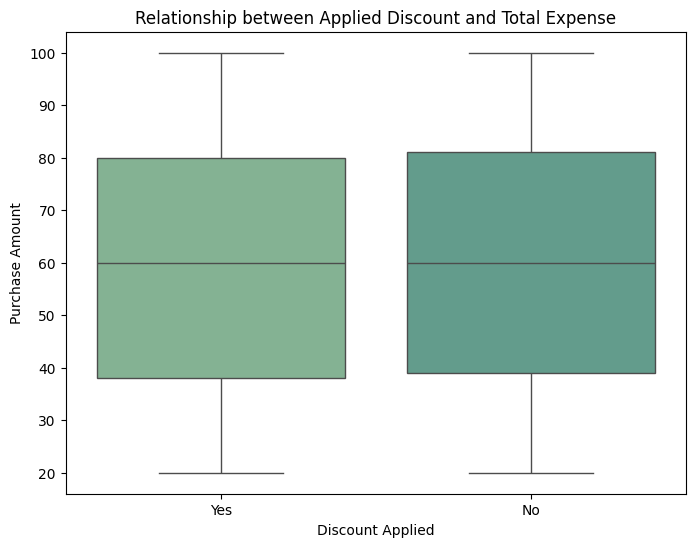

In [34]:

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Discount Applied',
    y='Purchase Amount (USD)',
    data=df,
    palette=colors
)

plt.title('Relationship between Applied Discount and Total Expense')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\2977336290.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', palette=colors, data=df)
C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\2977336290.py:1: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', palette=colors, data=df)


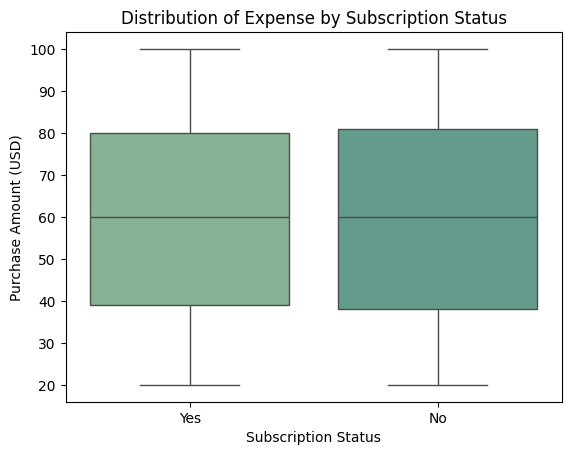

In [35]:
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', palette=colors, data=df)
plt.title('Distribution of Expense by Subscription Status')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\4285766373.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Purchase Amount (USD)', palette=colors, data=df)
C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\4285766373.py:1: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='Season', y='Purchase Amount (USD)', palette=colors, data=df)


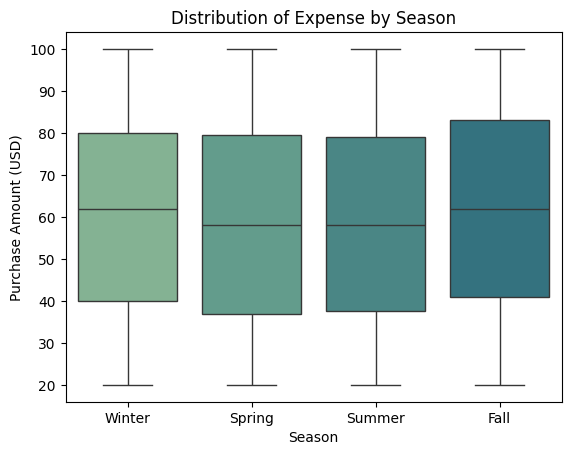

In [36]:
sns.boxplot(x='Season', y='Purchase Amount (USD)', palette=colors, data=df)
plt.title('Distribution of Expense by Season')
plt.show()

C:\Users\Claudia\AppData\Local\Temp\ipykernel_424\2581027625.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', palette=colors, data=df)


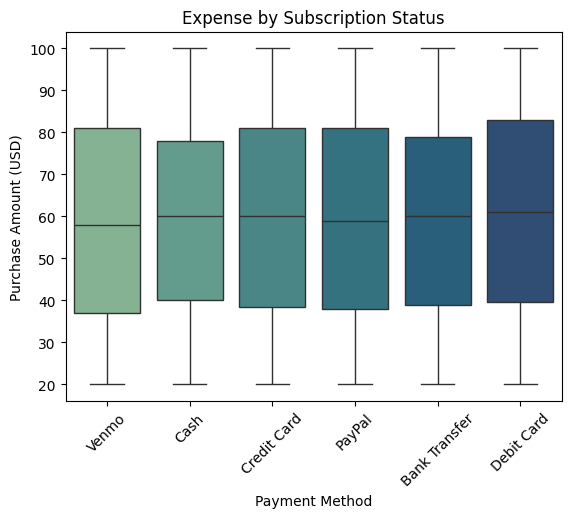

In [37]:
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', palette=colors, data=df)
plt.title('Expense by Subscription Status')
plt.xticks(rotation=45)
plt.show()

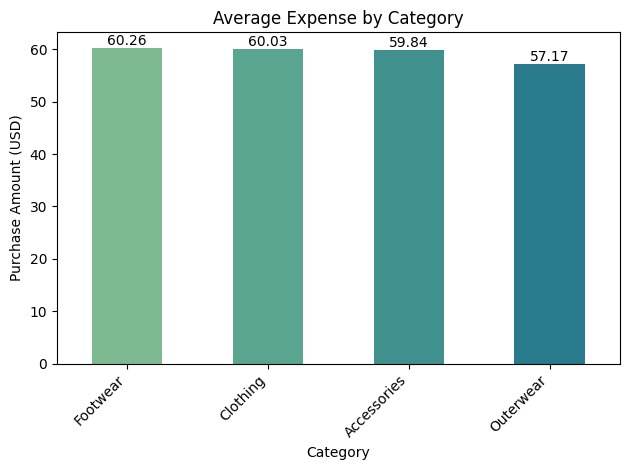

In [38]:
avg_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].mean()
avg_purchase_by_category = avg_purchase_by_category.sort_values(ascending=False)

graf = avg_purchase_by_category.plot(kind='bar', color=colors)


for i, value in enumerate(avg_purchase_by_category):
    graf.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)


plt.title('Average Expense by Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3. Data preprocessing

In [39]:
categorical_cols = ['Age Group', 'Category']
numeric_cols = ['Purchase Amount (USD)']
frequency_order = ['Bi-Weekly', 'Weekly', 'Fortnightly', 'Monthly', 'Every 3 Months', 'Quarterly', 'Annually']

categorical_data = df[categorical_cols]
numeric_data = df[numeric_cols]

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)

encoded_categorical = pd.DataFrame(onehot_encoder.fit_transform(categorical_data),
                                   columns=onehot_encoder.get_feature_names_out(categorical_cols))

label_encoder.fit(frequency_order)
df['Frequency of Purchases'] = label_encoder.transform(df['Frequency of Purchases'])


In [40]:
#Check if the numerical variables follow a normal distribution

for col in numeric_cols:
    stat, p_value = shapiro(df[col])
    if p_value > 0.05:
        print("The data follow a normal distribution (the null hypothesis is not rejected).")
    else:
        print("The data do not follow a normal distribution (the null hypothesis is rejected).")



The data do not follow a normal distribution (the null hypothesis is rejected).


In [41]:
scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_cols)


In [42]:
final_df = pd.concat([scaled_numeric_data, encoded_categorical, df['Frequency of Purchases']], axis=1)
print(final_df.head())

   Purchase Amount (USD)  Age Group_+60  Age Group_18-30  Age Group_31-40  \
0              -0.285629            0.0              0.0              0.0   
1               0.178852            0.0              1.0              0.0   
2               0.558882            0.0              0.0              0.0   
3               1.276716            0.0              1.0              0.0   
4              -0.454531            0.0              0.0              0.0   

   Age Group_41-60  Category_Accessories  Category_Clothing  \
0              1.0                   0.0                1.0   
1              0.0                   0.0                1.0   
2              1.0                   0.0                1.0   
3              0.0                   0.0                0.0   
4              1.0                   0.0                1.0   

   Category_Footwear  Category_Outerwear  Frequency of Purchases  
0                0.0                 0.0                       3  
1                0.0    

### 4. Clustering (K-Means)

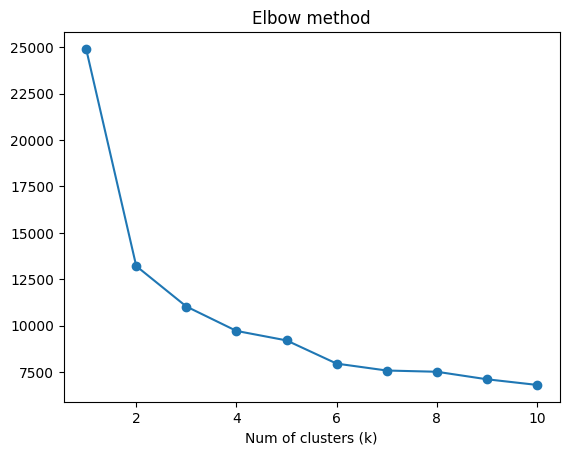

In [43]:
#Implement the K-Means algorithm to create customer clusters, determine the optimal number of clusters and visualize the clusters

#Calculate the inertia for different values ​​of k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Num of clusters (k)')
plt.show()

In [44]:
#Apply KMeans with the selected number of clusters
n_clusters=4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_df)

print(final_df.head())

#Check if we have chosen an adequate number of clusters
silhouette = silhouette_score(final_df, kmeans.labels_)
silhouette


   Purchase Amount (USD)  Age Group_+60  Age Group_18-30  Age Group_31-40  \
0              -0.285629            0.0              0.0              0.0   
1               0.178852            0.0              1.0              0.0   
2               0.558882            0.0              0.0              0.0   
3               1.276716            0.0              1.0              0.0   
4              -0.454531            0.0              0.0              0.0   

   Age Group_41-60  Category_Accessories  Category_Clothing  \
0              1.0                   0.0                1.0   
1              0.0                   0.0                1.0   
2              1.0                   0.0                1.0   
3              0.0                   0.0                0.0   
4              1.0                   0.0                1.0   

   Category_Footwear  Category_Outerwear  Frequency of Purchases  Cluster  
0                0.0                 0.0                       3        2  
1     

np.float64(0.3316331813833976)

In [45]:
print(final_df.groupby('Cluster').mean())

         Purchase Amount (USD)  Age Group_+60  Age Group_18-30  \
Cluster                                                          
0                     0.881512       0.172216         0.254879   
1                    -0.011623       0.202359         0.237750   
2                    -0.024100       0.176256         0.237443   
3                    -0.875720       0.188702         0.246394   

         Age Group_31-40  Age Group_41-60  Category_Accessories  \
Cluster                                                           
0               0.180253         0.392652              0.328358   
1               0.175136         0.384755              0.322142   
2               0.192694         0.393607              0.311416   
3               0.197115         0.367788              0.310096   

         Category_Clothing  Category_Footwear  Category_Outerwear  \
Cluster                                                             
0                 0.455798           0.144661            0.071

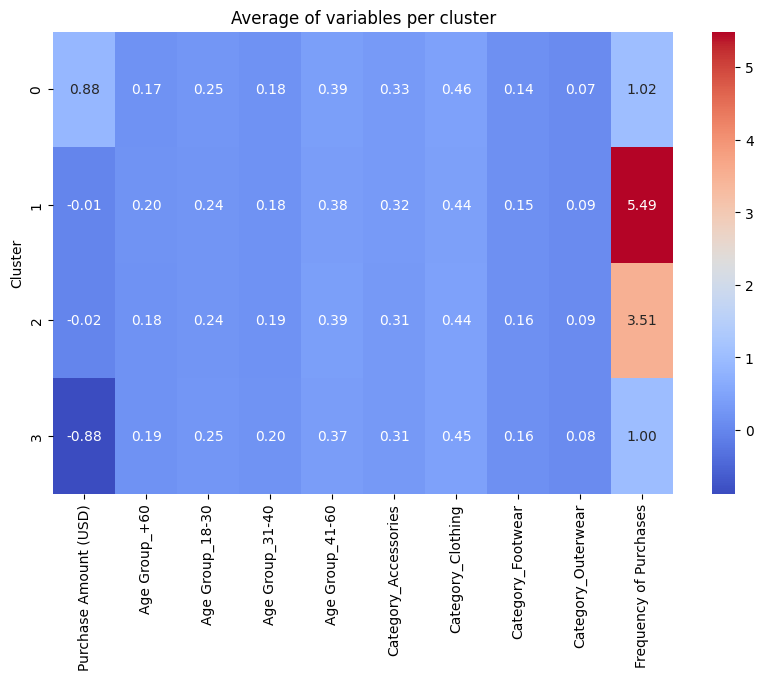

In [46]:
cluster_means = final_df.groupby('Cluster').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Average of variables per cluster')
plt.show()

Interpretation of the 4 clusters:

- Cluster0: Groups customers with high spending and low purchasing frequency.
- Cluster1: These customers have a very high purchasing frequency, but with low spending, predominantly young people up to 30 and between 41 and 60 years old.
- Cluster2: It is similar to Cluster1, but in this case the purchase frequency is moderate.
- Cluster3: Similar to Cluster0, but with a very low purchase cost.

### 5. DecisionTreeClassifier

In [47]:
#Encode
le = LabelEncoder()
final_df['Subscription Status'] = le.fit_transform(df['Subscription Status'])

#Encode Promo Code Used
final_df['Promo Code Used'] = le.fit_transform(df['Promo Code Used'])

#Encode Gender
final_df['Gender'] = le.fit_transform(df['Gender'])

#Encode Payment Method with OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
payment_method_ = pd.DataFrame(onehot_encoder.fit_transform(df[['Payment Method']]))


payment_method_.columns = onehot_encoder.get_feature_names_out(['Payment Method'])
final_df = pd.concat([final_df, payment_method_], axis=1)

final_df


,Purchase Amount (USD),Age Group_+60,Age Group_18-30,Age Group_31-40,Age Group_41-60,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Frequency of Purchases,Cluster,Subscription Status,Promo Code Used,Gender,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,-0.285629,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,2,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0.178852,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,2,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.558882,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6,1,1,1,1,0.0,0.0,1.0,0.0,0.0,0.0
3,1.276716,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.454531,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,3,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-1.341267,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,6,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3896,-0.454531,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,3,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3897,-1.130139,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3898,0.727784,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,6,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
final_df = final_df.drop(['Category_Accessories','Category_Clothing','Category_Footwear','Category_Outerwear','Cluster'],axis=1)
print(final_df.head())

   Purchase Amount (USD)  Age Group_+60  Age Group_18-30  Age Group_31-40  \
0              -0.285629            0.0              0.0              0.0   
1               0.178852            0.0              1.0              0.0   
2               0.558882            0.0              0.0              0.0   
3               1.276716            0.0              1.0              0.0   
4              -0.454531            0.0              0.0              0.0   

   Age Group_41-60  Frequency of Purchases  Subscription Status  \
0              1.0                       3                    1   
1              0.0                       3                    1   
2              1.0                       6                    1   
3              0.0                       6                    1   
4              1.0                       0                    1   

   Promo Code Used  Gender  Payment Method_Bank Transfer  Payment Method_Cash  \
0                1       1                           

In [49]:
print(final_df.head())

   Purchase Amount (USD)  Age Group_+60  Age Group_18-30  Age Group_31-40  \
0              -0.285629            0.0              0.0              0.0   
1               0.178852            0.0              1.0              0.0   
2               0.558882            0.0              0.0              0.0   
3               1.276716            0.0              1.0              0.0   
4              -0.454531            0.0              0.0              0.0   

   Age Group_41-60  Frequency of Purchases  Subscription Status  \
0              1.0                       3                    1   
1              0.0                       3                    1   
2              1.0                       6                    1   
3              0.0                       6                    1   
4              1.0                       0                    1   

   Promo Code Used  Gender  Payment Method_Bank Transfer  Payment Method_Cash  \
0                1       1                           

In [50]:
X = final_df[['Age Group_+60', 'Age Group_18-30', 'Age Group_31-40', 'Age Group_41-60',
        'Purchase Amount (USD)', 'Frequency of Purchases', 'Subscription Status', 
        'Payment Method_Bank Transfer','Payment Method_Cash','Payment Method_Credit Card','Payment Method_Debit Card','Payment Method_PayPal','Payment Method_Venmo', 'Gender']]
y = final_df[['Promo Code Used']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred = model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       635
           1       0.78      0.76      0.77       535

    accuracy                           0.80      1170
   macro avg       0.79      0.79      0.79      1170
weighted avg       0.80      0.80      0.80      1170



In [55]:
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

Cross-validation scores: [0.73076923 0.71410256 0.95897436 0.74871795 0.67051282]
Mean accuracy: 0.7646153846153846


AUC: 0.7931194348370005


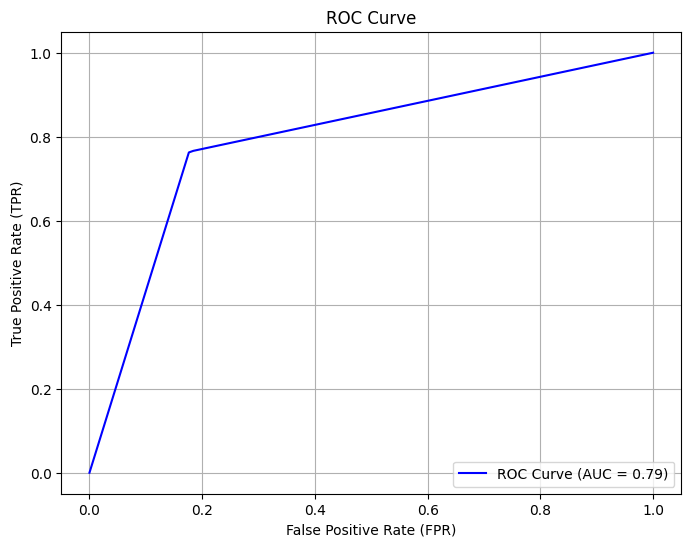

In [56]:
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")
plt.figure(figsize=(8, 6))
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

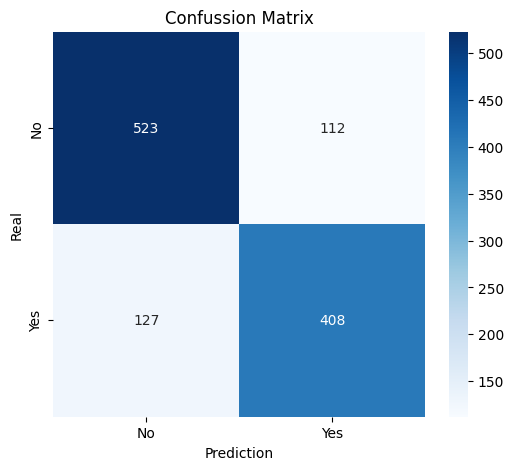

In [57]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confussion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.show()

In [58]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] 
}

#GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Training with GridSearchCV
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       635
           1       1.00      0.63      0.77       535

    accuracy                           0.83      1170
   macro avg       0.88      0.81      0.82      1170
weighted avg       0.87      0.83      0.82      1170



In [59]:
best_tree_model = DecisionTreeClassifier(criterion='gini', 
                                         max_depth=5, 
                                         min_samples_leaf=1, 
                                         min_samples_split=2, 
                                         random_state=42)

best_tree_model.fit(X_train, y_train)

y_pred = best_tree_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       635
           1       1.00      0.63      0.77       535

    accuracy                           0.83      1170
   macro avg       0.88      0.81      0.82      1170
weighted avg       0.87      0.83      0.82      1170



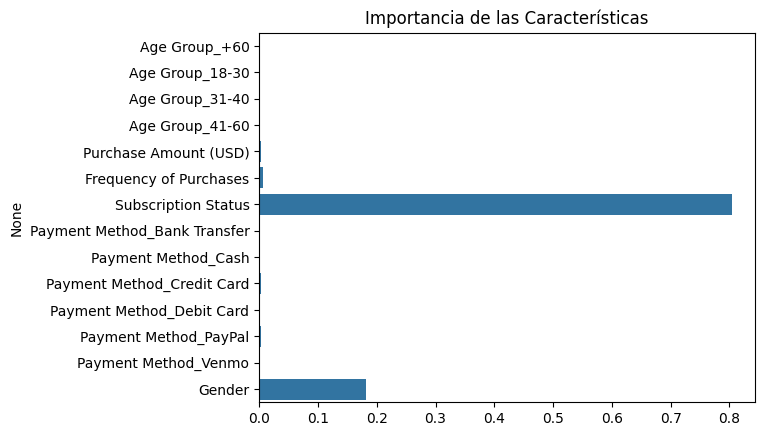

In [60]:
#Get the importance of features
importances = best_tree_model.feature_importances_

sns.barplot(x=importances, y=X_train.columns)
plt.title("Importancia de las Características")
plt.show()

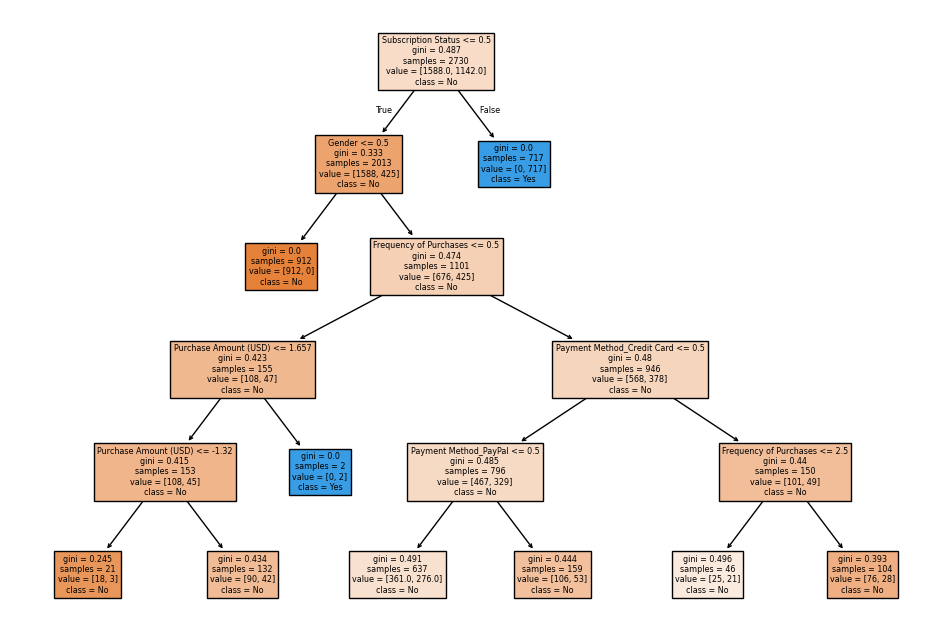

In [61]:
plt.figure(figsize=(12, 8))
tree.plot_tree(best_tree_model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()